<a href="https://colab.research.google.com/github/ShedovaNastya/design-workshop/blob/main/FaceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT MODULE

In [ ]:
import torch
import os
from IPython.display import clear_output
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/celebA_train_500.zip
clear_output()

#DATASET

In [ ]:
class FaceDataset(torch.utils.data.Dataset):

    def __init__(self, images_folder, label_folder, sample_folder, type_dataset, transform):
      """
      image_folder: путь до папки с изображениями
      label_folder: путь до файла, где какой человек находится
      sample_folder: путь до файла к какому датасету относится конкретное изображение
      type_dataset: датасет, который нас сейчас интересует
      transform: преобразование изображения
      """
      self.images_folder = images_folder
      self.label_folder = label_folder
      self.sample_folder = sample_folder
      self.type_dataset = type_dataset
      self.transform = transform


      with open(self.label_folder, 'r') as file: #человек
        self.labels = {}
        for i in file.readlines():
          key, value = i.split()
          self.labels[key] = int(value)

      with open(self.sample_folder, 'r') as file: #классификация датасетов
        self.samples = {}
        for i in file.readlines():
          key, value = i.split()
          self.samples[key] = int(value)

      self.files = [i for i in os.listdir(self.images_folder) if self.samples.get(i, 5) == self.type_dataset]

    def __len__(self):
      return len(self.files)

    def __getitem__(self, idx):
      image_name = self.images_folder + self.files[idx]
      image = np.array(Image.open(image_name))
      image = Image.fromarray(image[77:-41,45:-50])
      label = int(self.labels[self.files[idx]])
      image = self.transform(image)
      return image, label




In [ ]:
train_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            0,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))
val_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            1,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))
test_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            2,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))

In [ ]:
train_dataset[5]

(tensor([[[0.1294, 0.1333, 0.1451,  ..., 0.2392, 0.1804, 0.1725],
          [0.1412, 0.1451, 0.1608,  ..., 0.2549, 0.1961, 0.1882],
          [0.1765, 0.1804, 0.2000,  ..., 0.3020, 0.2431, 0.2353],
          ...,
          [0.6902, 0.6902, 0.7020,  ..., 0.0980, 0.1020, 0.1020],
          [0.6784, 0.6784, 0.6902,  ..., 0.1020, 0.1059, 0.1059],
          [0.6745, 0.6745, 0.6863,  ..., 0.1059, 0.1098, 0.1098]],
 
         [[0.0314, 0.0314, 0.0431,  ..., 0.1176, 0.0745, 0.0667],
          [0.0431, 0.0431, 0.0549,  ..., 0.1333, 0.0902, 0.0824],
          [0.0667, 0.0706, 0.0902,  ..., 0.1765, 0.1333, 0.1255],
          ...,
          [0.4549, 0.4549, 0.4627,  ..., 0.0863, 0.0824, 0.0824],
          [0.4471, 0.4471, 0.4588,  ..., 0.0902, 0.0863, 0.0863],
          [0.4431, 0.4431, 0.4549,  ..., 0.0941, 0.0902, 0.0902]],
 
         [[0.0431, 0.0431, 0.0549,  ..., 0.0471, 0.0078, 0.0000],
          [0.0510, 0.0549, 0.0667,  ..., 0.0627, 0.0235, 0.0157],
          [0.0784, 0.0784, 0.1020,  ...,

In [ ]:
train_dataset[5][0].shape

torch.Size([3, 224, 224])

In [ ]:
train_dataset[18][1]

350

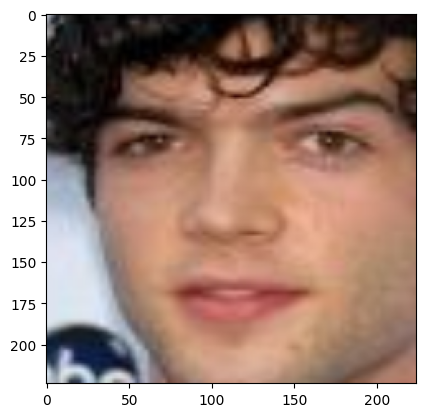

In [ ]:
plt.imshow(train_dataset[18][0].permute(1,2,0).numpy())

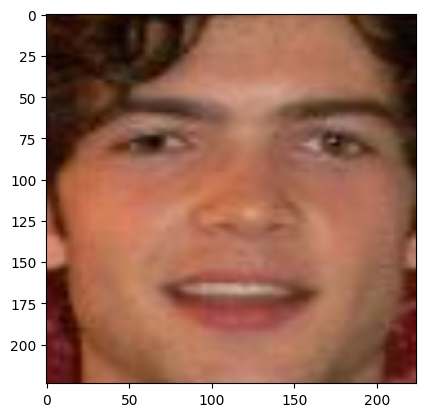

In [ ]:
for i in range(len(val_dataset)):
  if val_dataset[i][1] == 350:
    plt.imshow(val_dataset[i][0].permute(1,2,0).numpy())

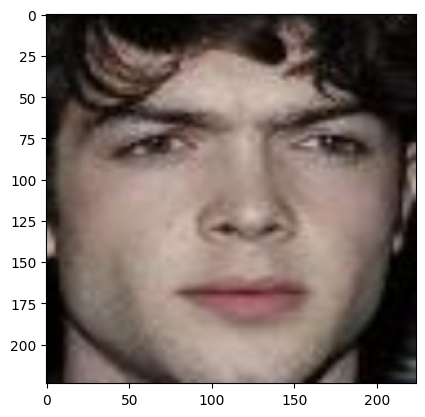

In [ ]:
for i in range(len(test_dataset)):
  if test_dataset[i][1] == 350:
    plt.imshow(test_dataset[i][0].permute(1,2,0).numpy())

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 30, shuffle = True)

In [ ]:
next(iter(train_loader)).s

[tensor([[[[0.9608, 0.9608, 0.9490,  ..., 0.6627, 0.6549, 0.6549],
           [0.9608, 0.9608, 0.9490,  ..., 0.6667, 0.6588, 0.6588],
           [0.9608, 0.9608, 0.9529,  ..., 0.6706, 0.6667, 0.6667],
           ...,
           [0.7216, 0.7294, 0.7569,  ..., 0.1333, 0.1255, 0.1255],
           [0.7373, 0.7451, 0.7843,  ..., 0.1294, 0.1294, 0.1294],
           [0.7451, 0.7529, 0.7961,  ..., 0.1294, 0.1294, 0.1294]],
 
          [[0.9137, 0.9137, 0.9020,  ..., 0.5098, 0.5059, 0.5059],
           [0.9137, 0.9137, 0.9020,  ..., 0.5137, 0.5098, 0.5098],
           [0.9137, 0.9137, 0.9059,  ..., 0.5176, 0.5176, 0.5176],
           ...,
           [0.6824, 0.6863, 0.7098,  ..., 0.0627, 0.0588, 0.0588],
           [0.6980, 0.7059, 0.7412,  ..., 0.0627, 0.0627, 0.0627],
           [0.7059, 0.7137, 0.7529,  ..., 0.0627, 0.0627, 0.0627]],
 
          [[0.8667, 0.8627, 0.8510,  ..., 0.4157, 0.4157, 0.4157],
           [0.8667, 0.8627, 0.8510,  ..., 0.4196, 0.4196, 0.4196],
           [0.8667, 0.86